# Fetching MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
# fetching the data 

mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
# using different keys 

mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [7]:
mnist.feature_names

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [8]:
X, y = mnist["data"], mnist["target"]

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

---
### Let's look into one digit from the data sets

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
some_digit = X[0]

In [13]:
# reshaping the first data

some_digit_image = some_digit.reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

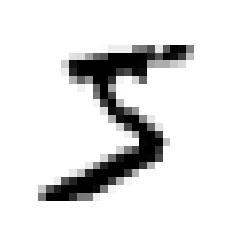

In [15]:
# Plotting the data 

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")

In [16]:
# It's target is y[0]

y[0]

'5'

In [18]:
# converting string to integer
import numpy as np

y = y.astype(np.uint8)

In [20]:
# MNIST dataset is already divided into train and test data

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [21]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
X_train.shape

(60000, 784)

---
# Training a Binary Classifier

In [23]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [24]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [25]:
y_test_5

array([False, False, False, ..., False,  True, False])

In [26]:
# using Stochastic Gradient Classifier

from sklearn.linear_model import SGDClassifier

In [27]:
sgd_clf = SGDClassifier(random_state=42)

In [28]:
# Fitting the model with train and test data

sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
# predicting the result of first data 'some_digit'

# The classifier guesses that this image represents a 5 (True).

sgd_clf.predict([some_digit])

array([ True])

---
# Implementing the StratifiedKFold Cross Validation

In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [32]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [38]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    

from sklearn.model_selection import cross_val_score    

0.95035
0.96035
0.9604


In [39]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

### Above 93% accuracy (ratio of correct predictions) on all cross-validation folds? This looks amazing, doesn’t it?
---

In [40]:
### Comparing with a simple classifier

from sklearn.base import BaseEstimator

In [41]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


In [42]:
never_5_clf = Never5Classifier()

In [43]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

---
# Confusion Matrix

In [44]:
from sklearn.model_selection import cross_val_predict

In [45]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

The first row of this matrix considers non-5 images (the negative
class): 53,892 of them were correctly classified as non-5s (they are called true
negatives), while the remaining 687 were wrongly classified as 5s (false positives).

The second row considers the images of 5s (the positive class): 1,891 were wrongly
classified as non-5s (false negatives), while the remaining 3530 were correctly classified
as 5s (true positives).

---
# Precision and Recall

In [48]:
from sklearn.metrics import precision_score, recall_score

In [49]:
precision_score(y_train_5, y_train_pred)

# When it claims an image represents a 5, it is correct only 83.7% of the time

0.8370879772350012

In [50]:
recall_score(y_train_5, y_train_pred) 

# It only detects 65.11% of the 5s.

0.6511713705958311

---
# Computing F1 Score

In [52]:
from sklearn.metrics import f1_score

In [53]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

The F1 score favors classifiers that have similar precision and recall.

---
# Precision-Recall Tradeoff

In [54]:
# decision_function() instead of predict() 

y_scores = sgd_clf.decision_function([some_digit])

In [55]:
y_scores

array([2164.22030239])

In [56]:
# setting threshold

threshold = 0

In [57]:
y_some_digit_pred = (y_scores > threshold)

In [58]:
y_some_digit_pred

array([ True])

---
# The SGDClassifier uses a threshold equal to 0, so the previous code returns the same result as the predict() method (i.e., True).

# Let’s raise the threshold:

In [60]:
threshold = 8000

In [61]:
y_some_digit_pred = (y_scores > threshold)

In [62]:
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually represents
a 5, and the classifier detects it when the threshold is 0, but it misses it when the
threshold is increased to 8,000.

---

Now how do you decide which threshold to use? For this you will first need to get the
scores of all instances in the training set using the cross_val_predict() function
again, but this time specifying that you want it to return decision scores instead of
predictions

In [63]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                                                        method="decision_function")

---

Now with these scores you can compute precision and recall for all possible thresholds
using the precision_recall_curve() function:

In [64]:
from sklearn.metrics import precision_recall_curve

In [65]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [66]:
#  Finally plotting the precision and recall as functions of threshold value 

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold, add the legend, axis label and grid
        

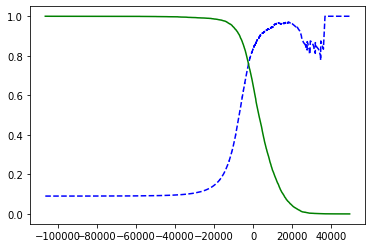

In [68]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

---
### ROC Curve

In [69]:
from sklearn.metrics import roc_curve

In [70]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [73]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate(Recall)")


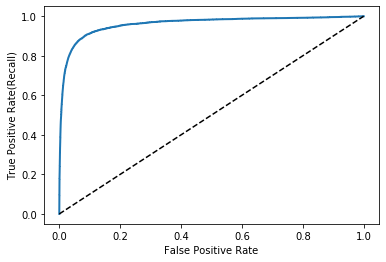

In [74]:
plot_roc_curve(fpr, tpr)

---
#  Getting Area Under Curve



In [75]:
from sklearn.metrics import roc_auc_score

In [76]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

---
# Comparing ROC and ROC AUC for RandomForestClassifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
forest_clf = RandomForestClassifier(random_state=42)

In [79]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                                method="predict_proba")

D:\Installed_Tools\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Installed_Tools\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Installed_Tools\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [80]:
# to plot a ROC curve, you need scores, not probabilities. A simple solution is to use the 
 # positive class’s probability as the score
    
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class    

In [81]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

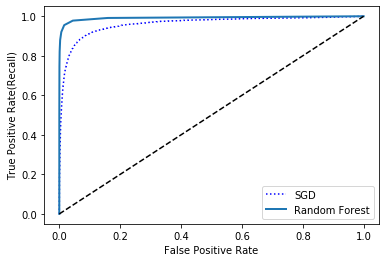

In [82]:
# Plotting the ROC

plt.plot(fpr, tpr, "b:", label="SGD")

plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

plt.legend(loc="lower right")

 RandomForestClassifer is looking much better than SGDClassifier
 
 ---

In [83]:
# ROC AUC for RandomForestClassifier

roc_auc_score(y_train_5, y_scores_forest)

0.9920527492698306

---
# Multi Class Classification

In [84]:
# Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass
 # classification task, and it automatically runs OvA (except for SVM classifiers for
    # which it uses OvO).
    
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5    

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:

sgd_clf.predict([some_digit])   # 3 is predicted

array([3], dtype=uint8)

That was easy! This code trains the SGDClassifier on the training set using the original
target classes from 0 to 9 (y_train), instead of the 5-versus-all target classes
(y_train_5).

---

Under the hood,
Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the
image, and selected the class with the highest score.

---

To see that this is indeed the case, you can call the decision_function() method.
Instead of returning just one score per instance, it now returns 10 scores, one per
class

In [86]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [87]:
# 3 have got the highest score

some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [88]:
np.argmax(some_digit_scores)

3

In [89]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [91]:
sgd_clf.classes_[3]

3

---
# For One Versus One   or   One Versus Rest Classifier

In [92]:
from sklearn.multiclass import OneVsOneClassifier

In [93]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [94]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [95]:
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [96]:
len(ovo_clf.estimators_)

45

In [98]:
# Training a RandomForestClassifier is just as easy:

forest_clf.fit(X_train, y_train)

D:\Installed_Tools\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [99]:
forest_clf.predict([some_digit])

array([5], dtype=uint8)

---

This time Scikit-Learn did not have to run OvA or OvO because Random Forest
classifiers can directly classify instances into multiple classes. You can call
predict_proba() to get the list of probabilities that the classifier assigned to each
instance for each class

In [100]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

---
Now of course you want to evaluate these classifiers. As usual, you want to use crossvalidation.
Let’s evaluate the SGDClassifier’s accuracy using the cross_val_score()
function

In [101]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

# It gets over 87% on all test folds

array([0.87082583, 0.87089354, 0.88628294])

In [102]:
# Applying the same thing but with scaling may increase the accuracy

from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()

In [104]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [105]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

D:\Installed_Tools\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89957009, 0.89344467, 0.89963495])

Performace with the Scaling has improved, now it is 89% plus in everyone 